Dataset: 
https://www.kaggle.com/datasets/rishidamarla/costs-for-cancer-treatment

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# **Data Preprocessing**

## Load the dataset

In [2]:
df = pd.read_csv('Costs for Cancer Treatment.csv')

In [3]:
df.head()

,Cost of Cancer Care by Phase of Care,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Costs ($) per year in millions of 2010 dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,See http://costprojections.cancer.gov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and l...,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
3,AllSites,2010,Both sexes,All ages,"Incidence, Survival at constant rate",0%,124565.6,40463.5,46642.8,37459.2
4,AllSites,2010,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0%,122420.8,38552.7,46671.9,37196.3


## Arrange columns and rows

### Get the column nams

In [4]:
columns = df.filter(items=[2], axis=0)
columns

,Cost of Cancer Care by Phase of Care,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
2,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and l...,Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost


### Set column names

In [5]:
columns = np.array(columns)[0]
columns

array(['Cancer Site', 'Year', 'Sex', 'Age',
       'Incidence and Survival Assumptions',
       'Annual Cost Increase (applied to initial and last phases)',
       'Total Costs', 'Initial Year After Diagnosis Cost',
       'Continuing Phase Cost', 'Last Year of Life Cost'], dtype=object)

In [6]:
df.columns = [
    'Cancer Site', 
    'Year', 
    'Sex', 
    'Age',
    'Survival Rate',
    'Annual Increase',
    'Total Costs', 
    'Initial Cost',
    'Continuing Cost', 
    'Last Cost']

In [7]:
df.columns

Index(['Cancer Site', 'Year', 'Sex', 'Age', 'Survival Rate', 'Annual Increase',
       'Total Costs', 'Initial Cost', 'Continuing Cost', 'Last Cost'],
      dtype='object')

### Remove first 3 rows

In [8]:
df = df.iloc[3:]

In [9]:
df.describe()

,Cancer Site,Year,Sex,Age,Survival Rate,Annual Increase,Total Costs,Initial Cost,Continuing Cost,Last Cost
count,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254
unique,19,11,3,1,4,3,1203,788,829,1195
top,AllSites,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",0%,1546.0,762.4,355.7,760.2
freq,66,114,990,1254,627,836,3,4,4,4


## Drop irrelevant columns

In [10]:
df.nunique()

Cancer Site          19
Year                 11
Sex                   3
Age                   1
Survival Rate         4
Annual Increase       3
Total Costs        1203
Initial Cost        788
Continuing Cost     829
Last Cost          1195
dtype: int64

In [11]:
columns_to_drop = ['Age', 'Continuing Cost', 'Last Cost']
df = df.drop(columns_to_drop, axis=1)
print('Droped irrelevant colums', df.shape)

Droped irrelevant colums (1254, 7)


## Remove data before 2015

In [12]:
df['Year'] = df['Year'].astype('int64')
df.drop(df[df['Year'] <= 2015].index, inplace=True)
df = df.reset_index(drop=True)

## Drop rows with missing values

In [13]:
df = df.dropna()
print('Droped rows with missing values', df.shape)

Droped rows with missing values (570, 7)


## Check is there any missing values

In [14]:
print("Missing values: ", df.isna().sum().sum())
# print(df.isna().sum())

Missing values:  0


## Drop duplicates

In [15]:
df = df.drop_duplicates()
print('Droped duplicate rows', df.shape)

Droped duplicate rows (570, 7)


## Check is there any duplicate rows

In [16]:
print('Duplicate rows: ', df.duplicated().sum())

Duplicate rows:  0


## Change data types

In [17]:
df['Annual Increase'] = df['Annual Increase'].apply(lambda x: x.replace('%',''))

In [18]:
df=df.astype({
    'Annual Increase': float,
    'Total Costs': float, 
    'Initial Cost': float
})
print(df.dtypes)

Cancer Site         object
Year                 int64
Sex                 object
Survival Rate       object
Annual Increase    float64
Total Costs        float64
Initial Cost       float64
dtype: object


## Visualize the dataset

In [19]:
print(f"Data skewness: {df.skew()}")

Data skewness: Year               0.000000
Annual Increase    1.305725
Total Costs        3.808220
Initial Cost       3.904088
dtype: float64


<ipython-input-19-114624436360>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f"Data skewness: {df.skew()}")


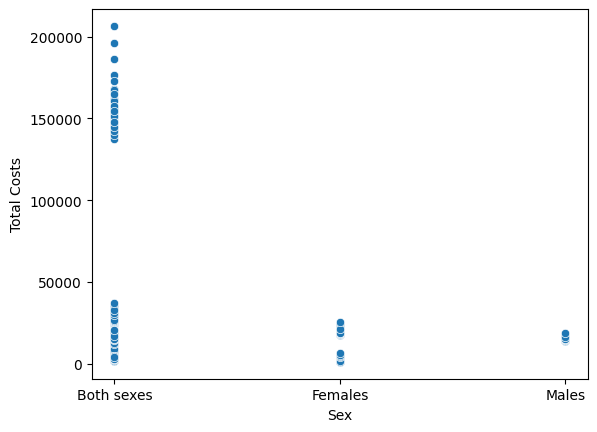

In [20]:
ax = sns.scatterplot(x="Sex", y="Total Costs", data=df)

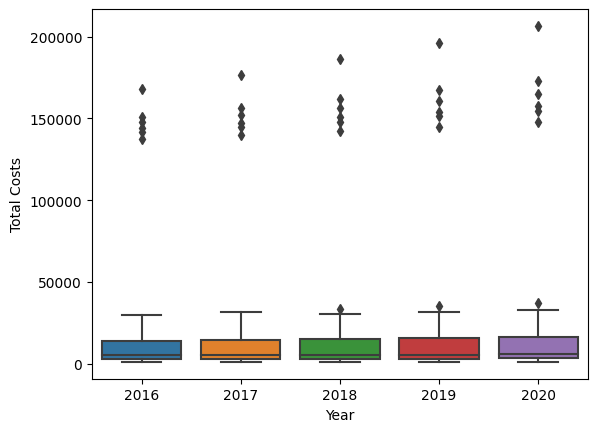

In [21]:
ax = sns.boxplot(x="Year", y="Total Costs", data=df)

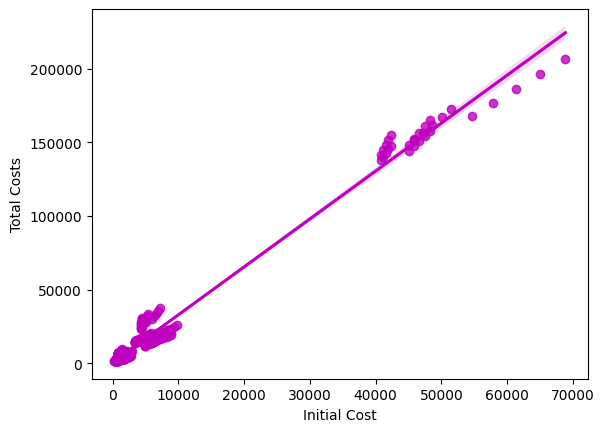

In [22]:
ax = sns.regplot(x="Initial Cost", y="Total Costs", data=df, color="m")

## Encode categorical varialbes

In [23]:
label_encoder = LabelEncoder()
df['Cancer Site'] = label_encoder.fit_transform(df['Cancer Site'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Survival Rate'] = label_encoder.fit_transform(df['Survival Rate']) 

## Normalize data

In [24]:
scaler = StandardScaler()
numerical_cols = ['Total Costs', 'Initial Cost']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 569
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cancer Site      570 non-null    int64  
 1   Year             570 non-null    int64  
 2   Sex              570 non-null    int64  
 3   Survival Rate    570 non-null    int64  
 4   Annual Increase  570 non-null    float64
 5   Total Costs      570 non-null    float64
 6   Initial Cost     570 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 35.6 KB


In [26]:
df.to_csv('cleaned_dataset.csv', index=False)

# **Design the Model**

In [27]:
df.sample(5)

,Cancer Site,Year,Sex,Survival Rate,Annual Increase,Total Costs,Initial Cost
168,9,2017,0,1,0.0,-0.295518,-0.396647
112,13,2016,0,2,2.0,0.334036,0.002173
346,0,2019,0,2,2.0,4.393593,4.310216
89,15,2016,0,2,5.0,-0.378194,-0.276696
474,3,2020,1,1,0.0,0.113560,0.174500


## Split data into features and target

In [28]:
X = df.drop(['Total Costs'], axis=1)
y = df['Total Costs']

## Split data into training and testing

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Initialize the model

In [30]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

## Train the model on training data

In [31]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Prediction on the test data

In [32]:
predictions = rf.predict(X_test)

## Evaluate Model

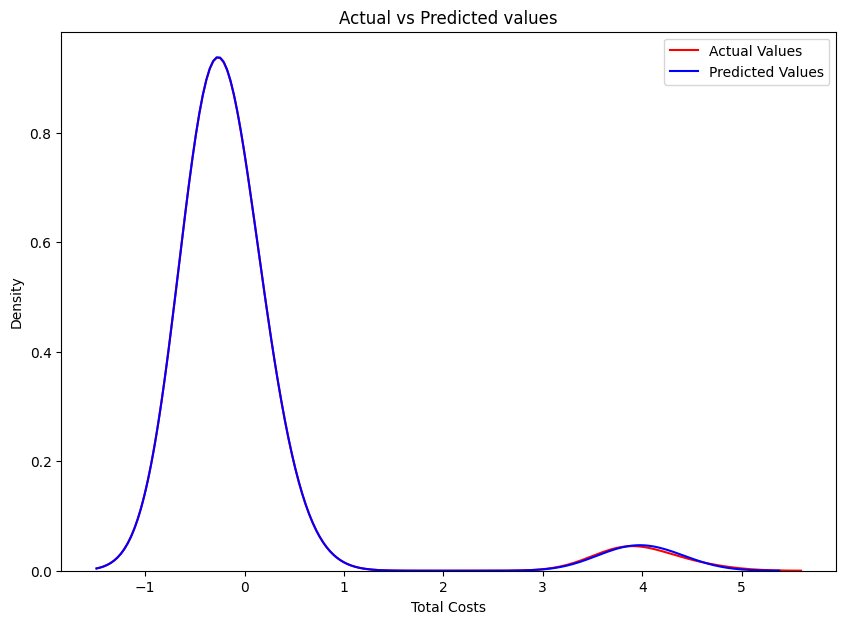

In [33]:
plt.figure(figsize=(10, 7))
ax = sns.kdeplot(y_test, color="r", label="Actual Values")
sns.kdeplot(predictions, color="b", label="Predicted Values", ax=ax) 
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

### R2 score

In [34]:
r2 = r2_score(y_test, predictions)
print("Prediction R2 score: ", r2)

Prediction R2 score:  0.9990796594406495


### Mean Absolute Error

In [35]:
mae = mean_absolute_error(y_test, predictions)
print("Test Mean Absolute Error:", mae)

Test Mean Absolute Error: 0.01077590488893187


### Mean Squared Error

In [36]:
mse = mean_squared_error(y_test, predictions)
print("Test Mean Squared Error:", mse)

Test Mean Squared Error: 0.0008019302174458541


### Feature Importances

In [37]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(list(X.columns), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:60} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Initial Cost                                                 Importance: 0.67839
Variable: Cancer Site                                                  Importance: 0.31557
Variable: Annual Increase                                              Importance: 0.00272
Variable: Sex                                                          Importance: 0.0024
Variable: Year                                                         Importance: 0.00047
Variable: Survival Rate                                                Importance: 0.00044


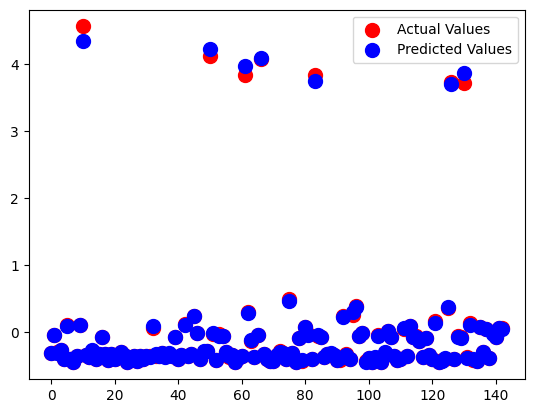

In [38]:
n = range(y_test.shape[0])
plt.scatter(n, np.array(y_test), s=100, c='red', label='Actual Values')
plt.scatter(n, predictions, s=100, c='blue', label='Predicted Values')
plt.legend()